# Урок 6. Наивный байесовский классификатор

В уроке мы подробно рассмотрели, как работает наивный байесовский классификатор, на примере частотной таблицы. Такие данные на практике встречаются довольно редко (если вы не работаете с классификацией текстов), поэтому сейчас предлагаем самостоятельно разобрать принцип работы гауссовского наивного Байеса, который можно встретить чаще остальных.

### 1.
Посмотрите, что включает в себя новый датасет Wine, где собраны результаты химического анализа вин, выращенных в одном регионе Италии тремя различными культиваторами. В наборе каждый из объектов имеет 13 числовых признаков.

Изучите попарные графики признаков (в уроках мы рассматривали их с помощью функции pd.plotting.scatter_matrix() ) и выберите такие два признака, используя которые, на ваш взгляд, можно будет лучше всего разделить данные по трем классам. Помните о том, что модель гауссовского наивного Байеса использует для предсказаний среднее и разброс значений признаков относительно среднего, поэтому вероятнее всего, лучшими признаками будут те, значения которых на графике разбросаны примерно одинаково от среднего значения, но как можно меньше накладываются на признаки других классов.

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
wine = load_wine()


In [2]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [3]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


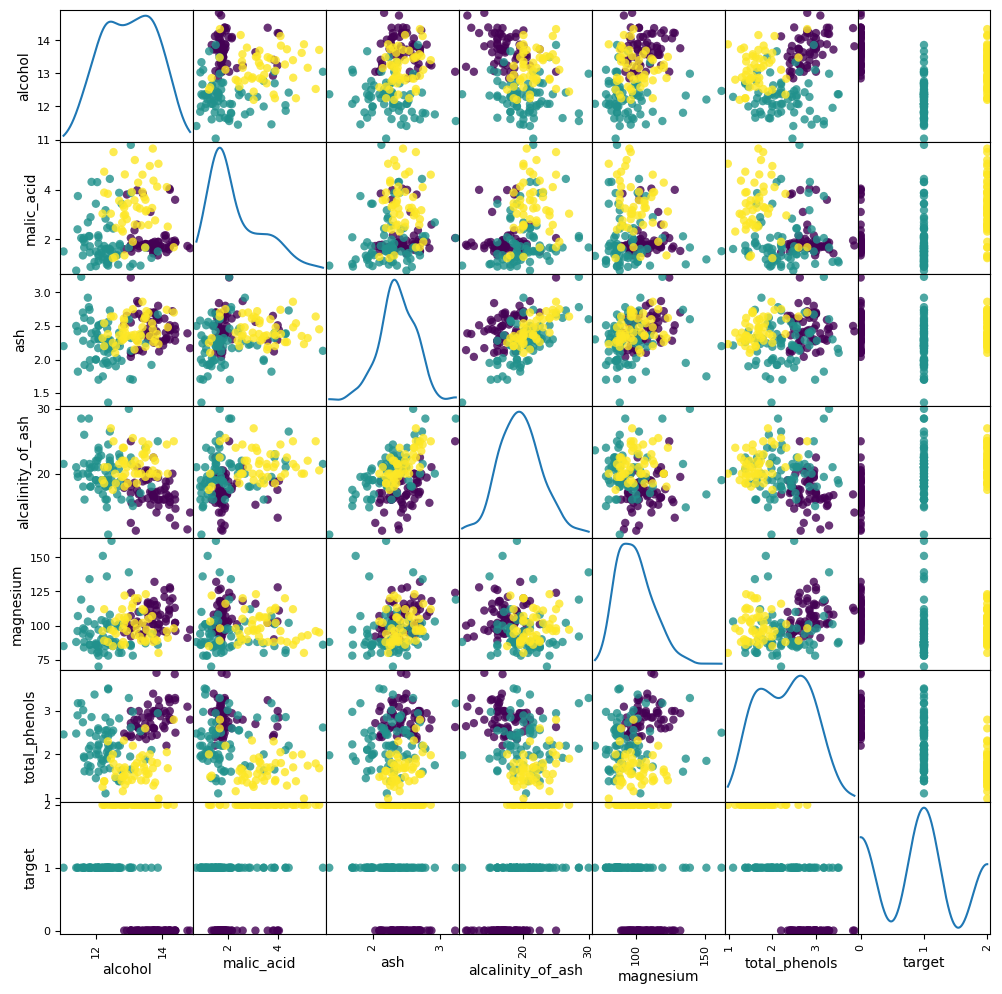

In [4]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Построим попарные графики (на небольшом поднаборе признаков, чтобы было нагляднее)
scatter_matrix(df[wine.feature_names[:6] + ['target']], figsize=(12, 12), c=df['target'], diagonal='kde', alpha=0.8, marker='o')
plt.show()


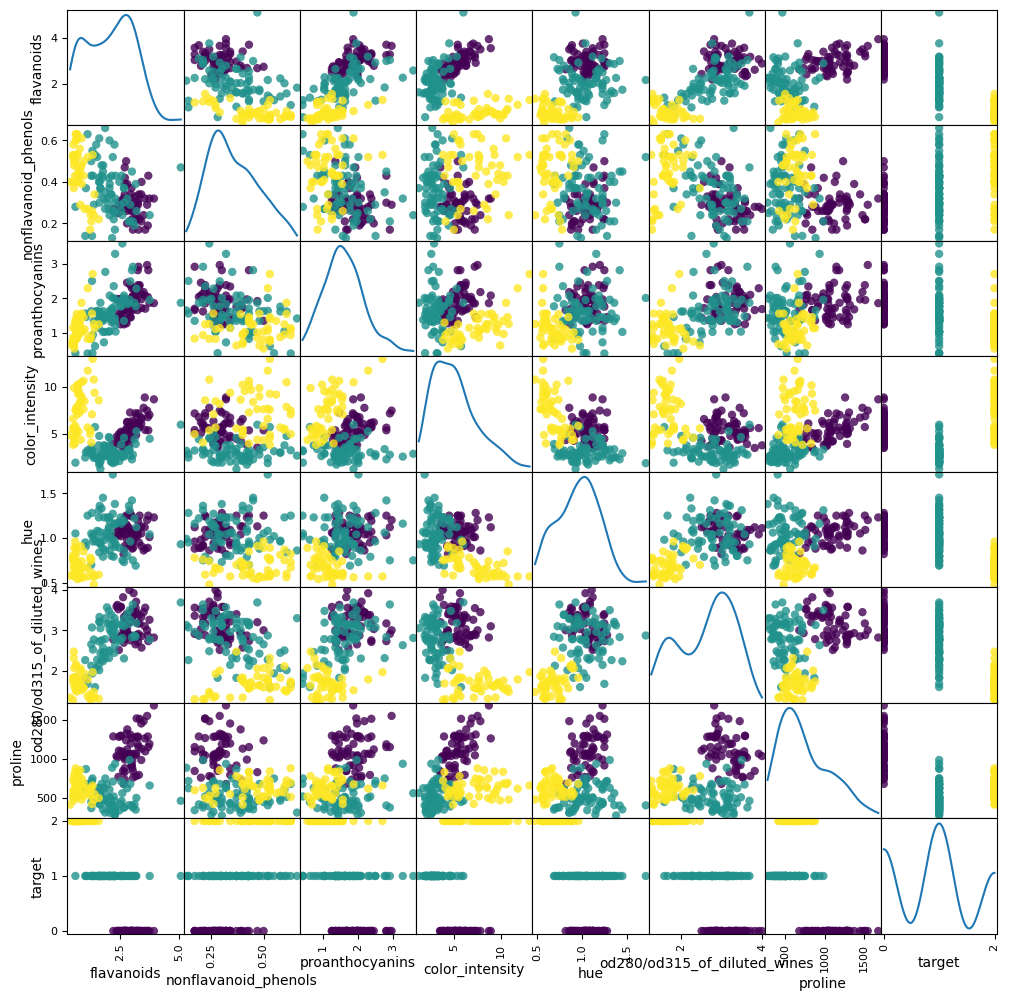

In [5]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Построим попарные графики (на небольшом поднаборе признаков, чтобы было нагляднее)
scatter_matrix(df[wine.feature_names[6:] + ['target']], figsize=(12, 12), c=df['target'], diagonal='kde', alpha=0.8, marker='o')
plt.show()


In [7]:
selected_features = ['color_intensity', 'od280/od315_of_diluted_wines']
selected_features1 = ['color_intensity', 'proline']
selected_features2 = ['flavanoids', 'proline']

### 2.
Разбейте данные на тренировочный и тестовый датасеты (при разбиении используйте параметр random_state=17 для воспроизводимости результатов) и постройте модель на двух выбранных признаках. Используя встроенную функцию *score()*, проверьте точность работы модели. Если score() меньше 0.88..., выберите по графику другие два признака и постройте модель на них. Укажите номера признаков, которые вы использовали (помните, что индекс массива признаков начинается с 0).

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [13]:
X_selected = df[selected_features]
y =df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

### 1 выбор признаков

In [14]:
X_selected = df[selected_features]
y =df.target
x_train, x_test, y_train, y_test = train_test_split(X_selected, 
                                                    y,
                                                    random_state=17) # random_state - для воспроизводимости

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (133, 2), y_train shape: (133,),
X_test shape: (45, 2), y_test shape: (45,)


In [16]:
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)
nb_predictions = nb.predict(x_test)
accuracy = nb.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9555555555555556


### 2 выбор признаков

In [17]:
X_selected = df[selected_features1]
y =df.target
x_train, x_test, y_train, y_test = train_test_split(X_selected, 
                                                    y,
                                                    random_state=17) # random_state - для воспроизводимости

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)
nb_predictions = nb.predict(x_test)
accuracy = nb.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

X_train shape: (133, 2), y_train shape: (133,),
X_test shape: (45, 2), y_test shape: (45,)
Accuracy: 0.8888888888888888


### 3 выбор признаков

In [18]:
X_selected = df[selected_features2]
y =df.target
x_train, x_test, y_train, y_test = train_test_split(X_selected, 
                                                    y,
                                                    random_state=17) # random_state - для воспроизводимости

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)
nb_predictions = nb.predict(x_test)
accuracy = nb.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

X_train shape: (133, 2), y_train shape: (133,),
X_test shape: (45, 2), y_test shape: (45,)
Accuracy: 0.9333333333333333


### 3.
Еще раз обучите модель на признаках с номерами 11, 12, предварительно снова разбив данные на тренировочные и тестовые (с random_state=17). С помощью функции predict_proba() посмотрите, какие вероятности были вычислены для каждого из классов, и выведите эти вероятности для объекта x_test[0].

In [ ]:
X_selected = df.iloc[:, [11, 12]]
y =df.target
x_train, x_test, y_train, y_test = train_test_split(X_selected, 
                                                    y,
                                                    random_state=17) # random_state - для воспроизводимости

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)
nb_predictions = nb.predict(x_test)
accuracy = nb.score(x_test, y_test)
probs = nb.predict_proba(x_test)
print(f'Accuracy: {accuracy}')
print("Вероятности для x_test[0]:", probs[0])

X_train shape: (133, 2), y_train shape: (133,),
X_test shape: (45, 2), y_test shape: (45,)
Accuracy: 0.9777777777777777
Вероятности для x_test[0]: [4.55643030e-03 9.95331407e-01 1.12163193e-04]
